Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [20]:
NAME = "Can the GBP/USD exchange rate be effectively forecasted using an ARIMA model?"
AUTHOR = "Tom Chatt"

---

# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and UNRs of the group members, like so

|Name|SNR|UNR|
|----|---|----|
|Tom Chatt|*******|*******|




See [the webpage](https://janboone.github.io/applied-economics/#org065a005) for details of what we expect to see in this assignment.



# Research question

### Can the GBP/USD exchange rate be effectively forecasted using an ARIMA model?

# Motivation

The United States (US) is the single largest country that the UK trades with (Office for National Statistics, 2018). The UK's trade relationship with the USA is very interesting, it is the economy where the UK has the largest trade surplus (with £99.569 billion in exports and imports of £66.313 billion). With Brexit on the horizon, a trade deal with the US is very likely and with it, increased trade. However, an appreciating currency would dampen the increase in demand associated with these trade agreements. 

<br>

The exchange rate analysed in this document is GBP/USD, which can be interpreted as the number of US Dollars ($) one Pound Sterling (£) buys. Export demand is affected by the price of the exports, a depreciation in the Pound would mean that exports are comparatively cheaper than they were before. As such, it is likely that US import demand would increase for goods from the UK (Parker & Pickard, 2020).


# Method

The method used for this forecast is ARIMA, which stands for Auto Regressive Integrated Moving Average. This methodology was first used by Box & Jenkins (1976) who devised the ARIMA methodology. This assignment also follows loosely the Box Jenkins methodology, which has three steps: <br>
1. Identification - using the data to select the appropriate model order.
2. Estimation - using the data to train the model and find parameter estimates
3. Diagnostics - looking at how to improve the model. 

Three types of forecasts will be made:
1. One step ahead forecast - where the ARIMA model uses all data up to and including period i and forecasts only for period i+1.
2. Dynamic forecast - the ARIMA model forecasts the full period i+k for a given number of periods k, using data up to and including period i. 
3. Out of sample forecasts - the ARIMA model forecasts for a given period in the future, for which there is no data. 

### Stationarity
There are many steps within the Identification stage, assessing the Stationarity of the time series is very important. Stationarity means that the distribution of the data does not change with time. It must fulfil three criteria:
  1. The series has zero trend (e.g it is not growing over time)
  2. The varience is constant
  3. The Autocorrelation is constant (how each value in the time series is related to its neighbours stays the same)

Hamilton (1994) defines a process as stationary in the following way, if neither the mean $ \mu_t $ or the autocovariances $ \gamma _{jt} $ depend on the date t, then the process $ Y_t $ is said to be weakly stationary. This is formally defined in the following way: $$ E(Y_t) = \mu \quad \quad for\; all \;t $$
$$ E(Y_t - \mu)(Y_{t-j} - \mu) = \gamma_j \quad \quad for \;all \;t \;and \;any\; j $$


In order to test for weak stationarity in the model the Augmented Dickie Fuller test (ADF) is used. This tests whether there is a Unit Root within the time-series data. 


##### Augmented Dickie Fuller Test


Phillips, P. (1987)<br>
$$ \Delta y = \mu + \gamma^* y_{t-1} + \sum_{j=1}^{p-1} \theta_j \Delta y_{t-j} + \epsilon_t $$ <br>
 Where p is the auto regressive order.  
The augmented dickie fuller test, tests to see whether $ \gamma^* = 0 $ , the model is non-stationary or has unit root present if $ \gamma^* = 0 $, <br><br>
As such the null hypothesis is: $ H_0 : \gamma^*=0 $ <br><br>

### Selecting the best model
#### Akaike Information Criterion (AIC)
AIC was originally formulated by Hirotugu Akaike in the paper Akaike, H. (1974), as an estimator of out of sample prediction error and thus quality, of a given estimator. The AIC then generates a score with the formula: $$ AIC = 2k-2ln(\hat{L}) $$
The model with the lowest AIC score is preferred. The absolute score is unimportant and instead the relative score should be compared when deciding which model order is chosen. (Burnham and Anderson, 2002)

### Limitations
ARIMA is not without fault, however with the papers Pai and Lin (2005) and Zhang (2003) both being critical of ARIMA. They state a range of limitations of the model, including the fact that the model must have a linear function form, which does not approximate a lot of real-world time series data accurately.


## Box Cox
Box Cox  aims to transform the data so that it follows a normal distribution. Box & Cox (1964) <br>
The Box Cox equation is as follows: $$ x(\lambda) = \frac{(x^\lambda - 1)}{\lambda} \quad \quad for \; \lambda \neq \; 0 $$
$$ x(\lambda) = ln(x) \quad \quad for \; \lambda \; = \; 0 $$

# Preview of the answers

The quality of the ARIMA predictions vary by forecast type, the one-step-ahead forecasts yield estimates very close to the ex-post values for the GBP/USD exchange rate. Conversely, the dynamic forecast captures the loose overall trend, but none of the large fluctuations seen in the dataset. It is impossible to state the accuracy of the out of sample forecast since it is ex-ante. However, from historical data we can assume that the GBP/USD exchange rate is highly unlikely to remain at a constant value of 1.307 (that being £1=$1.307).

# Main assumptions

##### For the accurate use of this model, we must assume the following is true (Box & Jenkins, 1976):
1. No suspected predictor variables are present in the model.
2. Level shifts are not present in the analysis.
3. Deterministic linear time trends are not present.
4. Seasonal dummies are not used.
5. One-time anomalies are not present in the data.
6. Parameters of the model remain constant
7. A homoscedastic error process is present over time.

# Data

The data used in this assignment is imported using the Quandl API. The Bank of England published this time series, which is daily data on the GBP/USD exchange rate. More information on the data can be found below:<br>
https://www.bankofengland.co.uk/boeapps/database/index.asp?Travel=NIxAZxRSx&TD=14&TM=Feb&TY=2019&into=GBP&CurrMonth=1&startDD=15&startMM=1&startYYYY=2018&From=Rates&C=C8P&G0Xtop.x=1&G0Xtop.y=1<br><br>
The code for the exact exchange rate is XUDLUSS





# Python code

Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Create as many python and markdown cells as you need to explain things well.
<br><br>

Installing some of the nescessary packages

In [21]:
%%capture
!pip install quandl

Importing relevant packages

In [22]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn
import quandl
import datetime as dt

Setting a parameter to 'today' allows the code to forecast using the most up to date data available from Quandl. 

In [23]:
today = pd.to_datetime('today')
today = today.date()

The code below uses the Quandl API to import the data into the dataframe. XUDLUSS is the Bank of Englands code for data on the GBP-USD exchange rate. The code also normalises the index values and sets the dataframe values to be numeric. 'convert_date=True' results in Pandas changing the index to be in DateTime format.

In [24]:
quandl.ApiConfig.api_key = "*****" # replace the asterisks with your QUANDL key
df = quandl.get("BOE/XUDLUSS", start_date="2000-01-01", end_date="2020-01-24", convert_date=True) #set end_date=today for dataset to include data until todays date,
#for validity of results end_date="2020-01-24"
df.index=df.index.normalize()
df.Value = pd.to_numeric(df.Value) # ensures the exchange rate values are numeric and not strings. 

The code cell below prints the first and last dates in the dataframe. 

In [25]:
start = df.index[0].date()
end = df.index[-1].date()
'The first date in the series is ' + str(start) + ' and the last date in the timeseries is ' + str(end)

'The first date in the series is 2000-01-04 and the last date in the timeseries is 2020-01-24'

### Resolving missing data issues
When running the ARIMA forecast I ran into an issue with the indexes. The UK FOREX markets are closed on Bank Holidays and as such no data is included in the dataset. This means that the ARIMA process cannot infer the frequency, when making out of sample forecasts. In order to overcome this issue I tried many things, but settled on the following methodology:
1. Update the Index to include all days from the first day of the timeseries to the last day.
2. Use the fillna 'ffill' method to fill in the missing days (at this stage it fills in weekends and bank holidays). This method fills in missing data by using the previous value. This makes sense, since for days when the market is closed, we assume the price takes the closing price from the last open day.  
3. The final step is to to update the index to only include 5 days a week (Monday to Friday) and remove the weekend values.
<br><br>

This has the result of filling bank holidays with the exchange rate from the day before, but not including weekend values since the markets are not open. 

In [26]:
index = pd.date_range(start, end)
df = df.reindex(index)

In [27]:
df.fillna(method='ffill', inplace=True)
df = df[df.index.dayofweek < 5]
df.head(7) # head(7) means that we can make sure that weekends are not included in the dataset

,Value
2000-01-04,1.6352
2000-01-05,1.6390
2000-01-06,1.6478
2000-01-07,1.6372
2000-01-10,1.6377
2000-01-11,1.6469
2000-01-12,1.6462


Reducing the dataset to only 2010-2020 should improve the forecast, since the recession of 2007-2008 acts as a large shock and could bias the forecasts, compared to the true ex-post values.

In [28]:
df = df.loc[df.index >= '2010-01-01']
col_names = ['GBPUSD']
df.columns = col_names
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2626 entries, 2010-01-01 to 2020-01-24
Data columns (total 1 columns):
GBPUSD    2626 non-null float64
dtypes: float64(1)
memory usage: 41.0 KB


Printing df.info shows that the pandas dataframe has 2626 entries, these are of a float64 file format. 

In [29]:
df.describe()

,GBPUSD
count,2626.000000
mean,1.471889
std,0.142507
min,1.206200
25%,1.315500
50%,1.523800
75%,1.589650
max,1.716900


df.describe shows summary statistics of the dataset. The mean is 1.47 (3 sig fig) which equates to £1 buying \\$1.47 USD. There is a large range in the dataset, from a min of 1.21 to a maximum of 1.71.

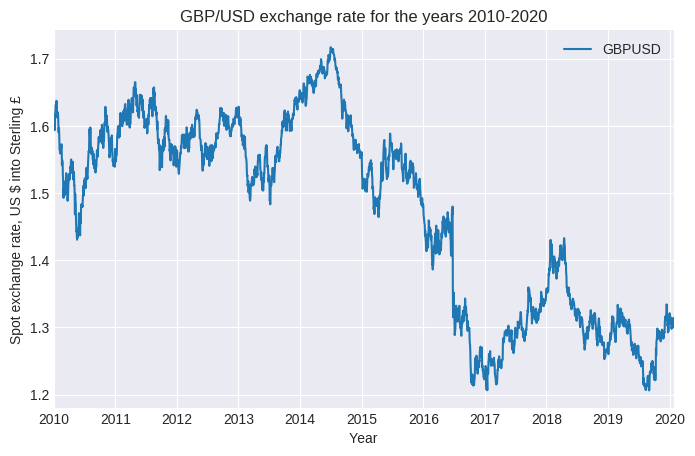

In [30]:
plt.style.use('seaborn-darkgrid')
%matplotlib inline
fig, ax = plt.subplots(figsize =(8,5), dpi=100)
df.plot(ax=ax)
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.xlabel('Year')
plt.title('GBP/USD exchange rate for the years 2010-2020')
plt.show()

In [31]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, BoxSelectTool, ColumnDataSource, Band
output_notebook()

Loading BokehJS ...

![alt text](bokeh_instructions.png "Making Bokeh Interactive")

In order to activate the interactive scroll zoom functionality of the Bokeh graphs, press the button highlighted above in the red square

In [32]:
hover = HoverTool(tooltips=[('Date', '@index{%F}'),
                           ('Exchange Rate', '@GBPUSD')], formatters={'index': 'datetime'})
source=ColumnDataSource(df)
plot = figure(x_axis_type='datetime', x_axis_label = 'Year', y_axis_label = 'Spot exchange rate, US \$ into Sterling £', tools=[hover, 'pan', 'wheel_zoom'], plot_width=1200)
plot.line(x='index', y='GBPUSD', line_width=1.5, selection_color='blue', legend='GBP-USD', source=source)
plot.circle(df.index, df.GBPUSD, fill_color='white', size=.3)
plot.legend.location = 'top_left'
plot.legend.background_fill_color = 'lightgrey'

output_file = ('GBPUSD.html')
show(plot)

The dataset wil be split into a test and a train set. This is done so that we can test the quality of the model fit. This assignment will use the standard split of assigning 3/4 of the data to the training set and 1/4 of the data to the testing set. 

In [33]:
split_point = round(len(df)*(3/4))
df_train = df[:split_point]
len_train = len(df_train)
df_test = df[split_point:]
len_test = len(df_test)
print('The first day of the testing dataset is '+str(df_test.index[0].date()))

The first day of the testing dataset is 2017-07-21


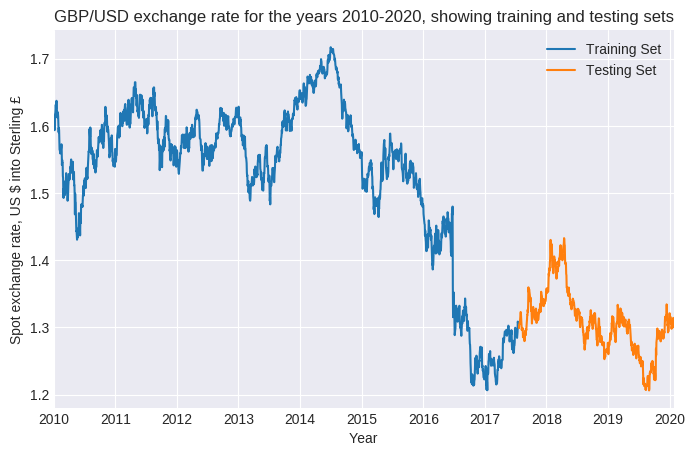

In [34]:
from matplotlib.pyplot import figure as fig
fig, ax = plt.subplots(figsize =(8,5), dpi=100)
df_train.plot(ax=ax)
df_test.plot(ax=ax)
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.xlabel('Year')
plt.title('GBP/USD exchange rate for the years 2010-2020, showing training and testing sets')
ax.legend(["Training Set", "Testing Set"])
plt.show()

# Stationarity

To ensure the data is staionary the ADF test is used below. 

In [35]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.GBPUSD)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.3332530375204266
p-value: 0.6138250791964055
Critical Values:
	1%: -3.4328493206938155
	5%: -2.8626442086617123
	10%: -2.56735780929621


Since the P-value is 0.614 (3 dp) we fail to reject the null hypothesis that the dataset is stationary. Therefore it is necessary to difference the time series.

In [36]:
df_diff = df.diff().dropna()

<function matplotlib.pyplot.show(*args, **kw)>

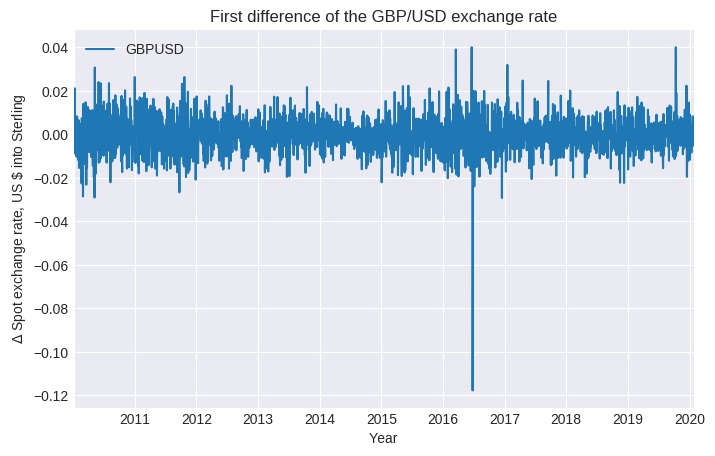

In [37]:
fig, ax = plt.subplots(figsize =(8,5), dpi=100)
df_diff.plot(ax=ax)
plt.ylabel('$\Delta$ Spot exchange rate, US \$ into Sterling')
plt.xlabel('Year')
plt.title('First difference of the GBP/USD exchange rate')
plt.show

The above graph looks much more promising, the data looks to be stationary. Again, below we test for stationarity using the ADF test.

In [38]:
result_diff = adfuller(df_diff.GBPUSD)
print('ADF Statistic: {}'.format(result_diff[0]))
print('p-value: {}'.format(result_diff[1]))
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -21.079530434251065
p-value: 0.0
Critical Values:
	1%: -3.4328493206938155
	5%: -2.8626442086617123
	10%: -2.56735780929621


The P value is 0.0 which is < 0.05. Therefore the null hypothesis (that the time series is non-stationary), is rejected at a 1% significance level. 

## The next step is to find the correct model order. ACF and PACF are used for this.

ACF is the Autocorrelation Function. <br>
- lag 1 autocorrelation is given by $$\rightarrow corr(y_t,y_{t-1})$$
- lag n autocorrelation is given by $$\rightarrow corr(y_t,y_{t-n})$$<br>

PACF is the Partial Autocorrelation Function and it shows the correlation between a time series and the lagged version of itself after subtracting the effect of correlation at smaller lags.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
df_diff_2 = df_diff.diff().dropna()

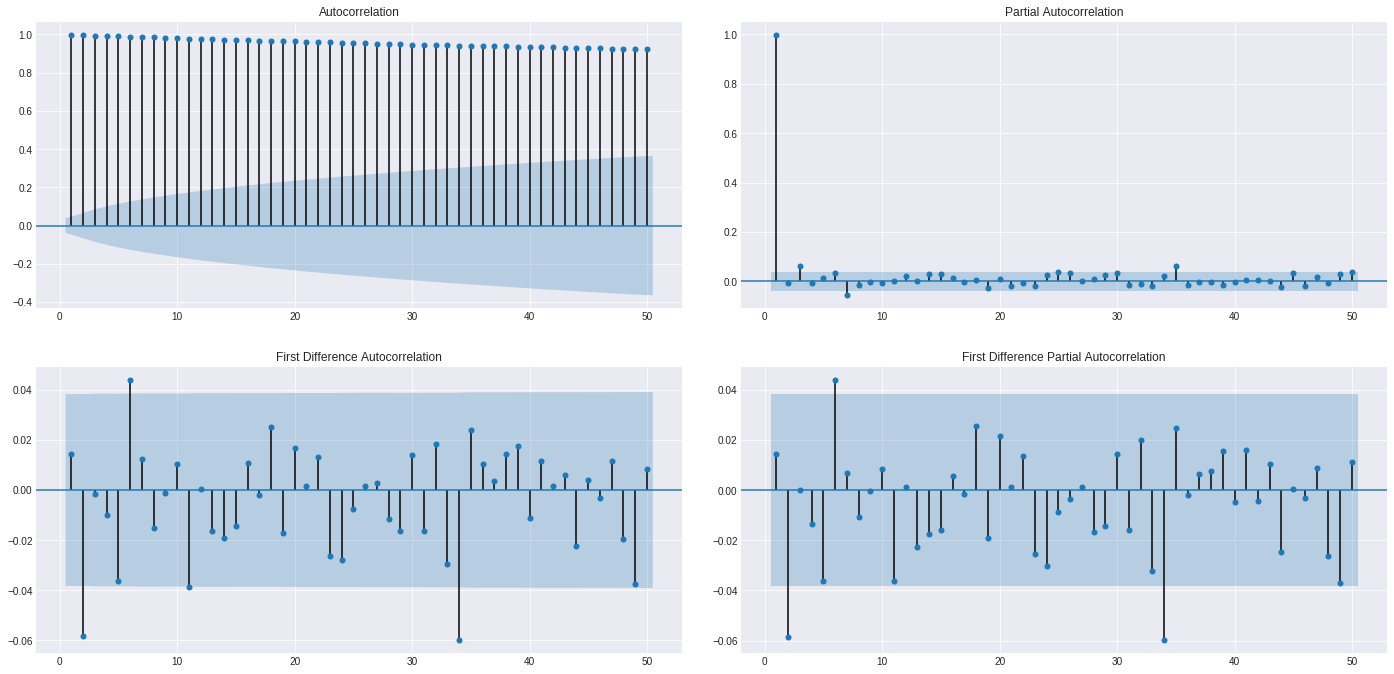

In [41]:
# make figure
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# make ACF plot
plot_acf(df, lags=50, zero=False, ax=ax1) # the value at 0 always =1 so setting zero=False means that this is not plotted

#make PACF plot
plot_pacf(df, lags=50, zero=False, ax=ax2)

# make ACF plot for first order differenced data
plot_acf(df_diff, lags=50, zero=False, ax=ax3, title='First Difference Autocorrelation') 

#make PACF plot for first order differenced data
plot_pacf(df_diff, lags=50, zero=False,  ax=ax4, title='First Difference Partial Autocorrelation'); 
fig.tight_layout(pad=3)

The ACF function for the non-differenced data set starts high and tails off very slowly, which suggesting that the dataset is non stationary. This is not the case in the differenced dataset and therefore, the first difference will be used in the final ARIMA model. 

## Other ways to find the correct order of the ARIMA model
### AIC - Akaike information criterion
A model which makes better predictions of the data is given a lower AIC score.

### BIC - Bayesian information criterion
Is a similar criterion to AIC but prefers simpler models with less parameters.<br><br>
AIC is better at choosing predictive models.

### Which is best? 

In the case of predicting exchange rates, the most desirable model is the one with the highest predictive power. As such, we pick the model with the lowest AIC score.  

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

It would be preferable to run the above code, however with the for-loops it creates 125 different options of ARIMA models to run. Therefore, it makes more sense to set parameter d=1 (the ADF test shows that after one difference the data is stationary) and therefore only have two for-loops reduces the number of ARIMA models to 16. A far easier realistic computational task. 

In [43]:
%%capture 
# in order to mute the errors relating to inferred frequency 
order_aic_bic=[]
#loop over AR order
for p in range(4):
    #loop over MA order:
    for q in range(4):    
        #fit the model
        model = SARIMAX(df, order=(p,1,q), trend='c')
        results=model.fit()
        # print the model order and the AIC/BIC scores
        order_aic_bic.append((p, q, results.aic, results.bic))

In [44]:
order_df = pd.DataFrame(order_aic_bic, columns = ['p', 'q', 'aic', 'bic'])

In [45]:
order_aic = order_df.sort_values('aic')
order_aic_sorted = order_aic.reindex(order_aic.aic.abs().sort_values(ascending=False).index) # sorts the data so that the result with the lowest value comes first. 
order_aic_sorted_best = order_aic_sorted.iloc[0] # sets the model order with the lowest value to the variable order_airc_sorted_best
print(order_aic_sorted.head(3))
print(order_aic_sorted_best)

   p  q           aic           bic
2  0  2 -17829.257086 -17805.765742
8  2  0 -17829.129777 -17805.638433
6  1  2 -17827.347182 -17797.983001
p          0.000000
q          2.000000
aic   -17829.257086
bic   -17805.765742
Name: 2, dtype: float64


The model with the lowest AIC score is preferred. The absolute score is not important, it is the relative score which matters. Since all of these scores are negative, reversing the sort order allows the model with the lowest AIC score to appear first.

In this case the model order=(012) has the lowest AIC score and thus has the best predictive power of the ARIMA models run. Therefore an ARIMA(0,1,2) model will be used.

In [46]:
p_lev =int(order_aic_sorted_best.values[0])
d_lev =1
q_lev =int(order_aic_sorted_best.values[1])

The above code sets parameter values for P and Q, based off of the sorting function to find the lowest AIC values.

# Fitting the Model

Now we fit the model using order=(0,1,2)

In [47]:
#fit the model
model=SARIMAX(df, order=(p_lev,d_lev,q_lev), trend='c')
results = model.fit()
#assign residuals to variable
resid = results.resid

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


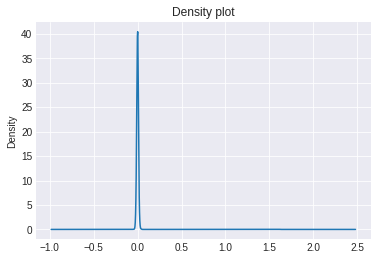

In [48]:
resid.plot(kind='kde', title='Density plot')

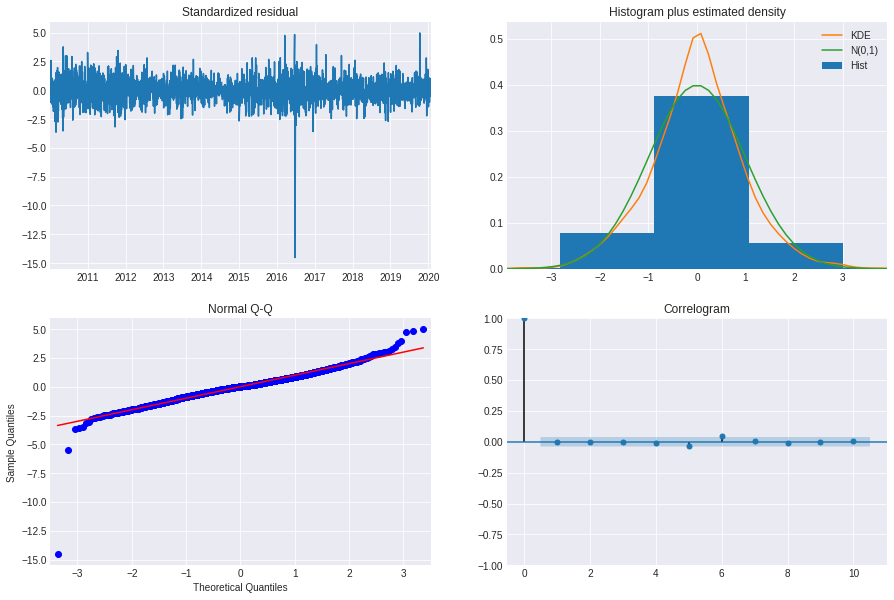

In [49]:
#calculate the mean absolute errors of the residuals
mae = np.mean(np.abs(resid))
results.plot_diagnostics(figsize=(15, 10))
plt.show()

## Overview of the plots
#### Standardized residuals
There are no clear structures in these residuals
#### Histogram plus estimated density
The smoothed histogram (green line) and normal distribution (orange line) are quite similar, which suggests the models are a good fit. The smoothed histogram line has a higher peak than the normal distribution but they follow a similar shape.
#### Normal Q-Q
Most of the residuals lie on the red line with only a small number at either end lying off of the red line. This is again positive, regarding a good model fit. The plot does show a small sigmoid-curve relationship, suggesting some Heteroskedasticity could be present. 
#### Correlogram
There is little correlation within the residuals. 

In [50]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                 GBPUSD   No. Observations:                 2626
Model:               SARIMAX(0, 1, 2)   Log Likelihood                8918.629
Date:                Thu, 20 Feb 2020   AIC                         -17829.257
Time:                        17:52:29   BIC                         -17805.766
Sample:                    01-01-2010   HQIC                        -17820.750
                         - 01-24-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.791      0.429      -0.000       0.000
ma.L1          0.0141      0.011      1.339      0.181      -0.007       0.035
ma.L2         -0.0580      0.018     -3.310      0.0

## Overview of the test statistics
Ljung-Box - tests whether the residuals are uncorrelated with each other: $$H_0:E(\epsilon_t | \epsilon_{t-z}) = 0   \quad \quad z \in (0,t)$$    
Therefore, at a 5% significance level, the null hypothesis is rejected since 0.19 > 0.05 <br><br>
Jarque-Bera - tests whether the data are distributed normally: $$H_0: \epsilon \sim N(\mu, \sigma^2)$$  <br><br>
The null hypothesis (that the data is normally distributed) is rejected and the data does not have the characteristics of Normality (where the data points are distributed normally).

# Further Testing

## Residuals
The ARIMA(0,1,2) model fails the Jarque-Bera test. This suggests that the data is not normally distributed and therefore the next step is to try and run the regression with transformed Data.

### Log
First it seems appropriate to take the log of the series and repeat the above steps

In [51]:
df_log = np.log(df)

### Compute the same analysis as above

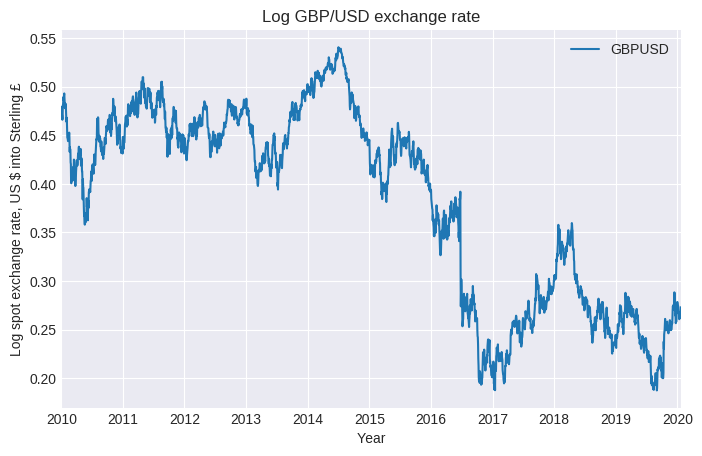

In [52]:
fig, ax = plt.subplots(figsize =(8,5), dpi=100)
df_log.plot(ax=ax)
plt.ylabel('Log spot exchange rate, US \$ into Sterling £')
plt.xlabel('Year')
plt.title('Log GBP/USD exchange rate')
plt.show()

In [53]:
result = adfuller(df_log.GBPUSD)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.3224029806398787
p-value: 0.6188616248632868
Critical Values:
	1%: -3.4328493206938155
	5%: -2.8626442086617123
	10%: -2.56735780929621


The data is non-stationary since we fail to reject the ADF null-hypothesis

In [54]:
df_log_diff = df_log.diff().dropna() # taking the first difference of the transformed series

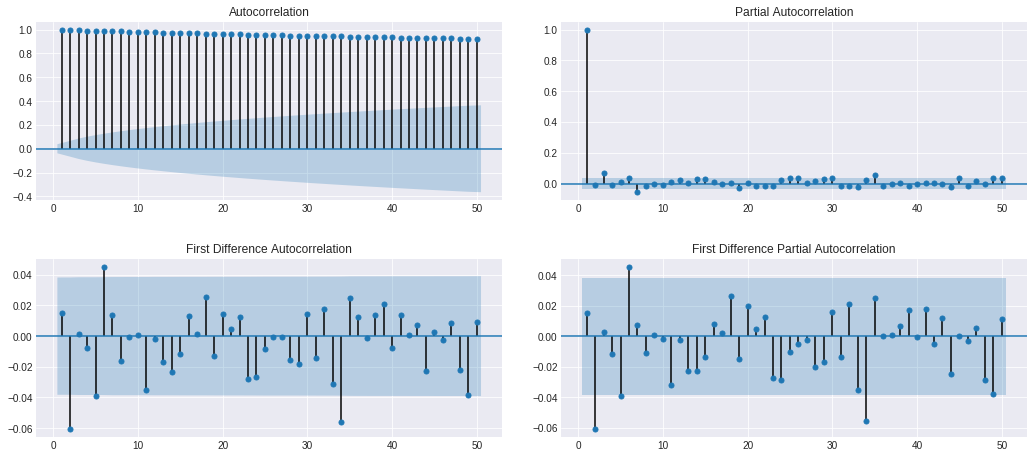

In [55]:
# make figure
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

# make ACF plot
plot_acf(df_log, lags=50, zero=False, ax=ax1) # the value at 0 always =1 so setting zero=False means that this is not plotted

#make PACF plot
plot_pacf(df_log, lags=50, zero=False, ax=ax2)

# make ACF plot for first order differenced data
plot_acf(df_log_diff, lags=50, zero=False, ax=ax3, title='First Difference Autocorrelation') 

#make PACF plot for first order differenced data
plot_pacf(df_log_diff, lags=50, zero=False,  ax=ax4, title='First Difference Partial Autocorrelation'); 
fig.tight_layout(pad=3)

In [56]:
result = adfuller(df_log_diff.GBPUSD)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -21.054342625489323
p-value: 0.0
Critical Values:
	1%: -3.4328493206938155
	5%: -2.8626442086617123
	10%: -2.56735780929621


The data is now stationary after taking the difference

In [57]:
%%capture 
# in order to mute the errors relating to inferred frequency 
order_aic_bic_log=[]
#loop over AR order
for p in range(4):
    #loop over MA order:
    for q in range(4):
        #fit the model
        model_log = SARIMAX(df_log, order=(p,1,q), trend='c')
        results_log=model_log.fit()
        # print the model order and the AIC/BIC scores
        order_aic_bic_log.append((p, q, results_log.aic, results_log.bic))

In [58]:
order_df_log = pd.DataFrame(order_aic_bic_log, columns = ['p', 'q', 'aic', 'bic'])

In [59]:
order_aic_log = order_df_log.sort_values('aic')
order_aic_sorted_log = order_aic_log.reindex(order_aic_log.aic.abs().sort_values(ascending=False).index)
order_aic_sorted_best_log = order_aic_sorted_log.iloc[0]
print(order_aic_sorted_log.head(3))
print(order_aic_sorted_best_log)

   p  q           aic           bic
2  0  2 -19776.501687 -19753.010342
8  2  0 -19776.384118 -19752.892773
6  1  2 -19774.524490 -19745.160309
p          0.000000
q          2.000000
aic   -19776.501687
bic   -19753.010342
Name: 2, dtype: float64


In this case the model 012 has the lowest AIC score and thus has the best predictive power of the ARIMA models run. Therefore an ARIMA(0,1,2) model will be used.

In [60]:
p_log =int(order_aic_sorted_best_log.values[0])
d_log =1
q_log =int(order_aic_sorted_best_log.values[1])

The above code sets parameter values for P and Q based off of the sorting function to find the lowest AIC values.

# Fitting the Model

In [61]:
#fit the model
model_log=SARIMAX(df_log, order=(p_log,d_log,q_log), trend='c')
#fit the model
results_log = model_log.fit()
#assign residuals to variable
resid_log = results_log.resid

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


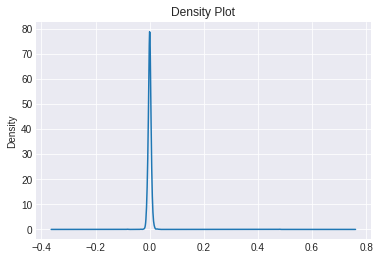

In [62]:
resid_log.plot(kind='kde', title='Density Plot')

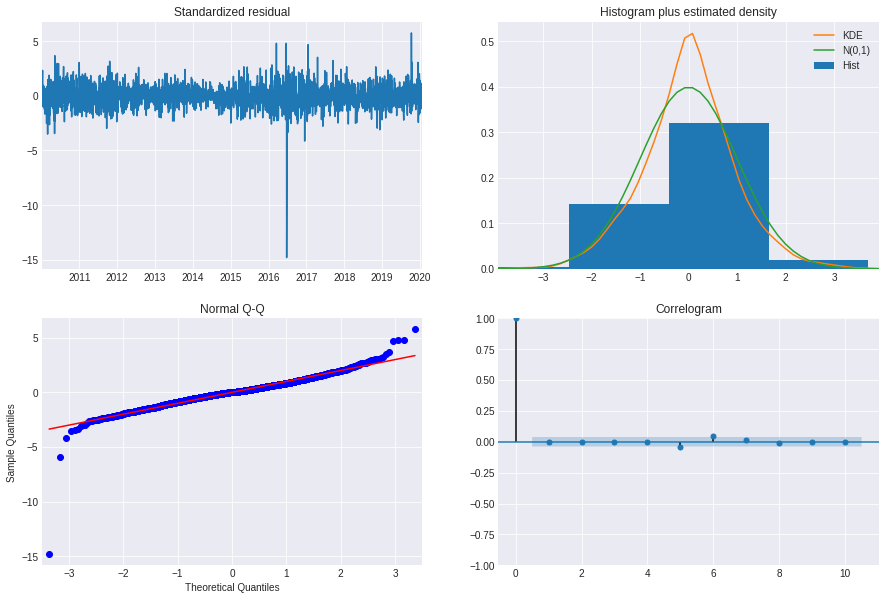

In [63]:
#calculate the mean absolute errors of the residuals
mae_log = np.mean(np.abs(resid_log))
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

In [64]:
print(results_log.summary())

                           Statespace Model Results                           
Dep. Variable:                 GBPUSD   No. Observations:                 2626
Model:               SARIMAX(0, 1, 2)   Log Likelihood                9892.251
Date:                Thu, 20 Feb 2020   AIC                         -19776.502
Time:                        17:53:52   BIC                         -19753.010
Sample:                    01-01-2010   HQIC                        -19767.994
                         - 01-24-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.488e-05      0.000     -0.788      0.431      -0.000       0.000
ma.L1          0.0156      0.010      1.594      0.111      -0.004       0.035
ma.L2         -0.0604      0.017     -3.591      0.0

## Results
The results are not much different from the level case. As such, this will not be accepted as a superior alternative for the forecasting. <br><br>

# Using Box Cox

Since the data still does not follow a normal distribution, the next thing to try is using a Box Cox transformation. 

In [65]:
from scipy.stats import boxcox

In [66]:
np_boxcox = np.asarray(df.GBPUSD.values)
np_boxcox = np_boxcox.squeeze() # to remove single dimensional entries from the shape array. 

In [67]:
box_cox = boxcox(np_boxcox) #performs the Box Cox transformation
np_box_cox = np.asarray(box_cox) # converts the Box Cox input into a numpy array
np_box_cox = np.hstack(np_box_cox) # horizontally stacks the array  in sequence 
np_box_cox = np_box_cox[:-1] #reverse the order

In [68]:
df_boxcox = pd.DataFrame(data=np_box_cox, index=df.index) #converts the numpy array into a data frame using the index of the original datadrame to this dataframe. 
col_names = ['GBPUSD']
df_boxcox.columns = col_names

In [69]:
df_boxcox_diff = df_boxcox.diff().dropna()

### Compute the same analysis as above

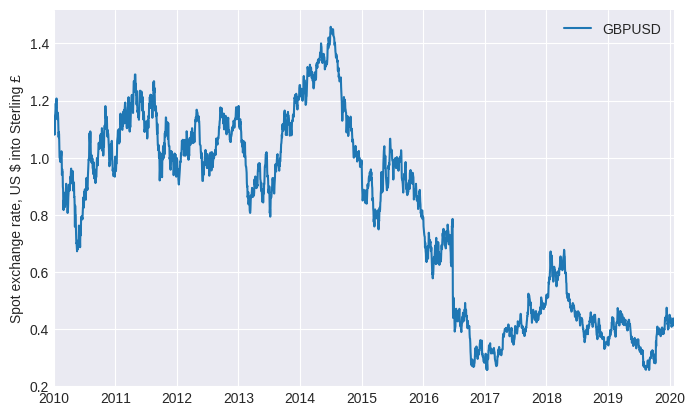

In [70]:
fig, ax = plt.subplots(figsize =(8,5), dpi=100)
df_boxcox.plot(ax=ax)
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.show()

In [71]:
result = adfuller(df_boxcox.GBPUSD)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.382059112397326
p-value: 0.5908463459880249
Critical Values:
	1%: -3.432845505561489
	5%: -2.8626425238284
	10%: -2.5673569122802786


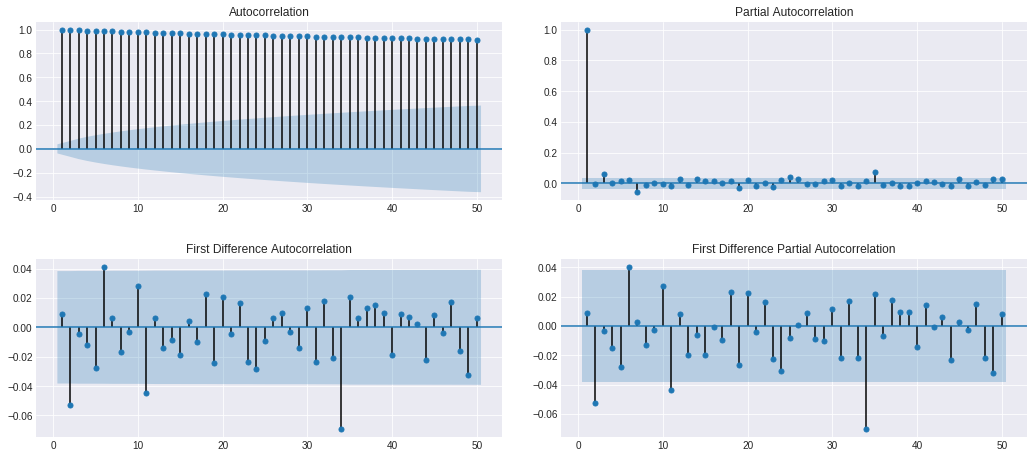

In [72]:
# make figure
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

# make ACF plot
plot_acf(df_boxcox, lags=50, zero=False, ax=ax1) # the value at 0 always =1 so setting zero=False means that this is not plotted

#make PACF plot
plot_pacf(df_boxcox, lags=50, zero=False, ax=ax2)

# make ACF plot for first order differenced data
plot_acf(df_boxcox_diff, lags=50, zero=False, ax=ax3, title='First Difference Autocorrelation') 

#make PACF plot for first order differenced data
plot_pacf(df_boxcox_diff, lags=50, zero=False,  ax=ax4, title='First Difference Partial Autocorrelation'); 
fig.tight_layout(pad=3)

In [73]:
result = adfuller(df_boxcox_diff.GBPUSD)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -38.00932429372726
p-value: 0.0
Critical Values:
	1%: -3.432845505561489
	5%: -2.8626425238284
	10%: -2.5673569122802786


In [ ]:
%%capture 
# in order to mute the errors relating to inferred frequency 
order_aic_bic_boxcox=[]
#loop over AR order
for p in range(4):
    #loop over MA order:
    for q in range(4):
        #fit the model
        model_boxcox = SARIMAX(df_boxcox, order=(p,1,q), trend='c')
        results_boxcox=model_boxcox.fit()
        # print the model order and the AIC/BIC scores
        order_aic_bic_boxcox.append((p, q, results_boxcox.aic, results_boxcox.bic))

In [ ]:
order_df_boxcox = pd.DataFrame(order_aic_bic_boxcox, columns = ['p', 'q', 'aic', 'bic'])

In [ ]:
order_aic_boxcox = order_df_boxcox.sort_values('aic')
order_aic_sorted_boxcox = order_aic_boxcox.reindex(order_aic_boxcox.aic.abs().sort_values(ascending=False).index)
order_aic_sorted_best_boxcox = order_aic_sorted_boxcox.iloc[0]
print(order_aic_sorted_boxcox.head(3))
print(order_aic_sorted_best_boxcox)

In this case the model 012 has the lowest AIC score and thus has the best predictive power of the ARIMA models run. Therefore an ARIMA(0,1,2) model will be used.

In [ ]:
p_boxcox =int(order_aic_sorted_best_boxcox.values[0]) #assigning optimal values for p and q for the following ARIMA modelling. 
d_boxcox =1
q_boxcox =int(order_aic_sorted_best_boxcox.values[1])

The above code sets parameter values for P and Q based off of the sorting function to find the lowest AIC values.

# Fitting the Model

In [ ]:
#fit the model
model_boxcox=SARIMAX(df_boxcox, order=(p_boxcox,d_boxcox,q_boxcox), trend='c')
results_boxcox = model_boxcox.fit()
#assign residuals to variable
resid_boxcox = results_boxcox.resid

In [ ]:
resid_boxcox.plot(kind='kde', title='Density Plot')

In [ ]:
#calculate the mean absolute errors of the residuals
mae_boxcox = np.mean(np.abs(resid_boxcox))
results_boxcox.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
print(results_boxcox.summary())

## Results
Using the Boxcox transformation has made the results worse. Therefore, we will use the original dataset. <br><br>

# Making forecasts
## One-step-ahead forecast

The forecasts will be made using an ARIMA(0,1,2) model, since the autoregressive order is zero this means that the model is only a moving average model, however ARIMA will be used since it forecasts using the first difference automatically and as such the the data is stationary. 

In [ ]:
#fit the model
model_osa=SARIMAX(df, order=(p_lev,d_lev,q_lev), trend='c')
results_osa = model_osa.fit()
#assign residuals to variable
resid_osa = results_osa.resid

In [ ]:
print(results_osa.summary())

In [ ]:
forecast_osa = results_osa.get_prediction(start=-len_test, end=df.index[-1])
#forecast mean
mean_forecast_osa = forecast_osa.predicted_mean
#get a confidence interval of forecasts
confidence_intervals_osa = forecast_osa.conf_int()

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
plt.figure(figsize=(15,10))
plt.plot(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast')
plt.plot(df_test, label='Testing dataset')
plt.xlabel('Year')
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.title('One step ahead forecast using ARIMA - US \$ into Sterling £')
plt.fill_between(mean_forecast_osa.index, confidence_intervals_osa['lower GBPUSD'], confidence_intervals_osa['upper GBPUSD'], color='pink', alpha=0.7)

legend_elements = [Line2D(df_test.index, df_test.values, color='b', label='Testing Dataset'),
                   Line2D(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements)

plt.show()

## Dynamic Forecast

In [ ]:
#fit the model
training_model=SARIMAX(df_train, order=(p_lev,d_lev,q_lev), trend='c', dynamic=True)
training_results = training_model.fit()
#assign residuals to variable
training_resid = training_results.resid

In [ ]:
print(training_results.summary())

In [ ]:
insample_forecast = training_results.get_prediction(start = df_train.index[-1], end=df_test.index[-1])
mean_insample_forecast = insample_forecast.predicted_mean
insample_confidence_intervals = insample_forecast.conf_int()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df_train)
plt.plot(df_test)
plt.plot(mean_insample_forecast.index, mean_insample_forecast, color='r', label='forecast')
plt.xlabel('Year')
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.title('Dynamic forecast using ARIMA - US \$ into Sterling £')
plt.fill_between(mean_insample_forecast.index, insample_confidence_intervals['lower GBPUSD'], insample_confidence_intervals['upper GBPUSD'], color='pink', alpha=0.5)

legend_elements_2 = [Line2D(df_train.index, df_train, color='blue', label='Training dataset'),
                   Line2D(df_test.index, df_test, color='orange', label='Testing dataset'),
                   Line2D(mean_insample_forecast.index, mean_insample_forecast, color='r', label='Dynamic forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements_2)

plt.show()

## Out of Sample Forecasts

In [ ]:
model_oos = SARIMAX(df, order=(p_lev,d_lev,q_lev))
result_oos = model_oos.fit()

In [ ]:
oos_forecast = result_oos.get_forecast(steps=364)
oos_mean_forecast = oos_forecast.predicted_mean
oos_confidence_intervals=oos_forecast.conf_int()

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(oos_mean_forecast.index, oos_mean_forecast, color='r', label='forecast')
plt.plot(df_test)
plt.xlabel('Year')
plt.ylabel('Spot exchange rate, US \$ into Sterling £')
plt.title('Out of sample forecast using ARIMA - US \$ into Sterling £')
plt.fill_between(oos_mean_forecast.index,
                 oos_confidence_intervals['lower GBPUSD'],
                 oos_confidence_intervals['upper GBPUSD'],
                 color='pink', alpha=0.5)

legend_elements_3 = [Line2D(df_test.index, df_test, color='blue', label='Testing dataset'),
                   Line2D(mean_insample_forecast.index, mean_insample_forecast, color='r', label='Out of sample forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements_3, loc='upper left')
plt.show()

## All on one graph

In [ ]:
df_mean_insample_forecast = pd.DataFrame(data=mean_insample_forecast, columns=['GBPUSD'])
df_insample_confidence_intervals = pd.DataFrame(data=insample_confidence_intervals)
df_mean_osa_forecast = pd.DataFrame(data=mean_forecast_osa, columns=['GBPUSD'])
df_osa_confidence_intervals = pd.DataFrame(data=confidence_intervals_osa)
df_mean_oos_forecast = pd.DataFrame(data=oos_mean_forecast, columns=['GBPUSD'])
df_oos_confidence_intervals = pd.DataFrame(data=oos_confidence_intervals)

In [ ]:
source_1=ColumnDataSource(df_train)
source_2=ColumnDataSource(df_mean_insample_forecast)
source_3=ColumnDataSource(df_insample_confidence_intervals)
source_4=ColumnDataSource(df_mean_osa_forecast)
source_5=ColumnDataSource(df_osa_confidence_intervals)
source_6=ColumnDataSource(df_test)
source_7=ColumnDataSource(df_mean_oos_forecast)
source_8=ColumnDataSource(df_oos_confidence_intervals)
plot_2 = figure(x_axis_type='datetime', x_axis_label = 'Time', y_axis_label = 'Spot exchange rate, US $ into Sterling', title='Forecasting the GBP/USD exchange rate using ARIMA', tools=[hover, 'pan', 'wheel_zoom'], plot_width=1200)
plot_2.line(x='index', y='GBPUSD', line_width=1.5, legend='Training Dataset', source=source_1, color='mediumaquamarine')
plot_2.line(x='index', y='GBPUSD', line_width=1.5, legend='Testing Dataset', source=source_6, color='blue')
plot_2.line(x='index', y='GBPUSD', line_width=1.5, legend='Step By Step Forecast', source=source_4, color='red')
plot_2.line(x='index', y='GBPUSD', line_width=1.5, legend='Dynamic Forecast', source=source_2, color='green')
plot_2.line(x='index', y='GBPUSD', line_width=1.5, legend='Out of sample Forecast', source=source_7, color='red')
band = Band(base='index', lower='lower GBPUSD', upper='upper GBPUSD', source=source_5, level='underlay', fill_alpha=0.40, fill_color='purple')
band_2 = Band(base='index', lower='lower GBPUSD', upper='upper GBPUSD', source=source_3, level='underlay', fill_alpha=0.30, fill_color='orange')
band_3 = Band(base='index', lower='lower GBPUSD', upper='upper GBPUSD', source=source_8, level='underlay', fill_alpha=0.30, fill_color='grey')
plot_2.legend.location = 'bottom_left'
plot_2.legend.background_fill_color = 'lightgrey'
plot_2.add_layout(band)
plot_2.add_layout(band_2)
plot_2.add_layout(band_3)
output_file = ('forecast.html')
show(plot_2)

<br>

# Discussion and conclusion

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).
<br><br>

### Results
The results from the ARIMA analysis suggests that in the future, the GBP/USD exchange rate will remain constant at a value of 1.307. The result implies that the out of sample forecast is unlikely to be accurate, since historically, as can be seen from the graphs, this exchange rate has varied greatly over the time period. In this respect, it could be assumed that ARIMA is not effective at forecasting the exchange rates. This flat line prediction could suggest that the model thinks that the data is a random walk, and as such the best prediction for the out of sample forecast is the last value in the time series. <br><br> On the other hand, the step by step forecast yields promising results. Using a training and testing dataset, the forecasted values are very close to the ex-post values of the testing dataset. Therefore, this single test of a single time period suggests that for one-step-ahead forecasts (in this case only one day ahead) ARIMA is reasonably accurate. However, in order to gain more insight we would have to compare this to different forecasting methodology, some potential options of which will be covered later in this section. It would, however, be concerning if the model could not closely follow the ex-post data in the step by step forecast because the forecast are calculated daily for only one day in advance.<br><br> The accuracy of the dynamic forecast made by the ARIMA model, fall somewhere in-between those made by the one-step-ahead forecasts and the out of sample forecasts. The prediction made by the model is that the exchange rate will depreciate, which was accurate in the period from April 2018 - August 2019. However, there were large fluctuations in the period of the dynamic forecast, and the ARIMA model has not taken these into account.If only the first and last periods of the forecast were viewed in isolation, it may seem that a linear, slightly upward trending forecast would be appropreate. The forecast period started with an exchange rate of 1.298 and ended at 1.307, however as the graph shows, this does not tell the full story of the time series. The maximum exchange rate reached in this period was 1.433 and the minimum was 1.206, a fluctuations not incorporated into the timeseries forecast. 

### Potential explanation
There are many reasons why the ARIMA forecast could have been innacurate on all models, apart from the one-step-ahead model. ARIMA forecasts only take into account two factors, an auto-regressive element and a moving average element. The auto-regressive part of the ARIMA function implies that the value of the exchange rate depends on the past values of the exchange rate, and the moving average element assumes that the current value for the exchange rate depends on past forecast errors. <br><br> Exchange rates are very complicated instruments, and are subject to non-fundemental shocks, as outlined in the paper Straub & Tchakarov (2004), but also referred to in the papers: Jeanne & Rose (2002) and Gradojevic & Yang (2006). Non-fundamental exchange rate volatility is due to investors' expectations and not by changes in the economic fundamentals of the exchange rate.<br><br> In the case of the pound sterling, the Brexit referendum was likely to have a large effect on expectations surrounding the currency. This may be to blame for the large depreciation in the currency (seen between late 2015 and 2017) and the slump on and shortly after the 26$^{th}$ of June 2016 (Brexit referendum day). An ARIMA model forecasting this period would not have incorperated this large exogenous shock into the forecast.<br><br> This is a major issue (and weakness) when using ARIMA for such expectation and news orientated instruemnts. 




### Improvements
A potential improvement could be to use an ARIMAX model, the same as an ARIMA model but including exogenous variables. In the case of exchange rates, this could be an expectation variable, however in practice this is unlikely to be easy to add to the model. The paper Osborn (1990) finds that "only interest rates and the exchange rate exhibit no significant (deterministic or stochastic) seasonality". Therefore, it is inappropriate to use SARIMA or SARIMAX methodology (which incorporates seasonality into the forecasts) for the exchange rate time series.<br><br> A more realistic improvement to the forecasting methodology would be to use Neural Networks, which has been done before in papers such as Yao & Tan (2000) with promising results. 

# References

Akaike, H. (1974). A new look at the statistical model identification. *IEEE transactions on automatic control* , 19(6), 716-723.<br><br>
Box, G., & Cox, D. (1964). An Analysis of Transformations. *Journal of the Royal Statistical Society*. Series B (Methodological), 26(2), 211-252 <br><br>
Box, G. E., & Jenkins, G. M. (1976). *Time series analysis. Forecasting and control.* In Holden-Day Series in Time Series Analysis, Revised ed., San Francisco: Holden-Day, 1976. <br><br>
Burnham, K. P., & Anderson, D. R. (2002). *A practical information-theoretic approach. Model selection and multimodel inference* , 2nd ed. Springer, New York.<br><br>
Gradojevic, N., & Yang, J. (2006). Non‐linear, non‐parametric, non‐fundamental exchange rate forecasting. *Journal of Forecasting* , 25(4), 227-245.<br><br>
Hamilton, J. D. (1994). *Time series analysis*. Princeton, N.J: Princeton University Press <br><br>
Jeanne, O., & Rose, A. K. (2002). Noise trading and exchange rate regimes. *The Quarterly Journal of Economics* , 117(2), 537-569.<br><br>
Osborn, D. R. (1990). A survey of seasonality in UK macroeconomic variables. *International Journal of Forecasting* , 6(3), 327-336.<br><br>
Pai, P. F., & Lin, C. S. (2005). A hybrid ARIMA and support vector machines model in stock price forecasting. *Omega* , 33(6), 497-505.<br><br>
Parker, G. & Pickard, J. (2020, January 20). Johnson sets sights on speedy US and EU trade deals. *Financial Times* . Retrieved from https://www.ft.com/content/e5bd670e-3bab-11ea-a01a-bae547046735<br><br>
Phillips, P. (1987). Time Series Regression with a Unit Root. *Econometrica* , 55(2), 277-301. <br><br>
Office for National Statistics. (2018). *Who does the UK trade with?* Retrieved from https://www.ons.gov.uk/businessindustryandtrade/internationaltrade/articles/whodoestheuktradewith/2017-02-21<br><br>
Straub, R., & Tchakarov, I. (2004). *Non-fundamental exchange rate volatility and welfare*_ Working Paper Series 328, European Central Bank. <br><br>
Yao, J., & Tan, C. L. (2000). A case study on using neural networks to perform technical forecasting of forex. *Neurocomputing* , 34(1-4), 79-98.<br><br>
Zhang, G. P. (2003). Time series forecasting using a hybrid ARIMA and neural network model. *Neurocomputing* , 50, 159-175.<br>